In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 분류 위한 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# train/test data set 분리 라이브러리
from sklearn.model_selection import train_test_split
# 성능 평가 라이브러리
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
# 데이터 불러오기ㅏ
from sklearn.datasets import load_iris

로지스틱 회귀 _간단한 예제

In [3]:
#train data 정의 
x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0,0,0,1,1,1]) #앞의 3개의 음의 값 0 , 양의값 1 

#test data 정의 
test_x1 = [[-2, 2]]

#모두 양수일 확률 
test_x = [[2, 2]]

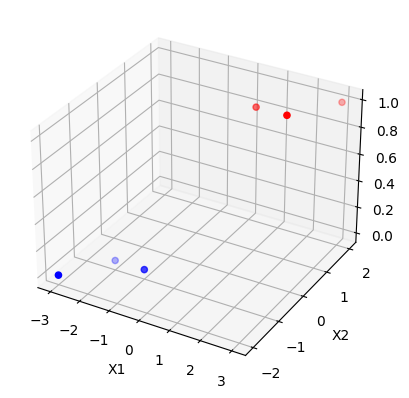

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D 그래프를 위한 모듈

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.scatter([-1, -2, -3], [-1, -1, -2], [0, 0, 0], color='blue')
ax.scatter([1, 2, 3], [1, 1, 2], [1, 1, 1], color='red')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [5]:
#훈련 
lr = LogisticRegression()

lr.fit(x, y)


LogisticRegression()

In [6]:
#클래스 확률 예측 
lr.predict_proba(test_x)
#클래스가 1(모두 양수)일 확률이 95.1%
lr.predict_proba(test_x1)
#클래스가 0(모두 음수)일 확률이 60.79%


array([[0.60798904, 0.39201096]])

In [7]:
lr.predict(test_x)

array([1])

선형판별분석(LDA)간단한 예제 

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(x,y)

LinearDiscriminantAnalysis()

In [9]:
lda.predict_proba(test_x)

array([[1.12535162e-07, 9.99999887e-01]])

In [10]:
lda.predict(test_x)

array([1])

In [13]:
heart = pd.read_csv('../../data/data자료/Heart.csv', index_col=0)
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [14]:
heart.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [15]:
#독립변수, 종속변수 
x = heart[["Age","Sex","Chol"]]
y = heart['AHD']

In [16]:
#훈련용/ 평가용 데이터 분리 
x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
#훈련 
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [18]:
#테스트 데이터 사용, 예측
y_pred = lda.predict(x_test)

In [20]:
print(y_test)
print()
print(y_pred)

220     No
272     No
90      No
102     No
68      No
      ... 
286    Yes
244    Yes
95      No
292     No
156    Yes
Name: AHD, Length: 61, dtype: object

['Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes']


In [21]:
cm = confusion_matrix(y_test, y_pred) #분류평가
cm

array([[23, 10],
       [11, 17]], dtype=int64)

In [22]:
#분류결과 평가 
#precision(정밀도) TP / (TP+FP)
precision_score(y_test, y_pred, average='macro')

0.6530501089324618

In [23]:
#recall(재현율) TP / (TP+FN)
recall_score(y_test, y_pred, average='macro')

0.652056277056277

In [24]:
#accuracy (정확도) TP+TN / ALL
accuracy_score(y_test, y_pred)

0.6557377049180327

Lris data 예제

In [27]:
x_iris, y_iris = load_iris(return_X_y=True)
#X, y 형태로 데이터를 받겠다는 의미 

In [28]:
x_iris[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [30]:
y_iris
# 0, 1, 2 >>3가지 클래스가 존재 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
#훈련 
lr = LogisticRegression(random_state=42,max_iter=200)
lr.fit(x_iris, y_iris)

LogisticRegression(max_iter=200, random_state=42)

In [38]:
#클래스 예측
lr.predict(x_iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
# 클래스 예측 (비율)
lr.predict_proba(x_iris)

array([[9.81582149e-01, 1.84178370e-02, 1.45037721e-08],
       [9.71334633e-01, 2.86653367e-02, 3.02002465e-08],
       [9.85275379e-01, 1.47246089e-02, 1.23416748e-08],
       [9.76064364e-01, 2.39355958e-02, 3.97162430e-08],
       [9.85233534e-01, 1.47664538e-02, 1.20082617e-08],
       [9.70223275e-01, 2.97766507e-02, 7.40057470e-08],
       [9.86775607e-01, 1.32243729e-02, 1.99863799e-08],
       [9.76146346e-01, 2.38536264e-02, 2.77424010e-08],
       [9.79628342e-01, 2.03716271e-02, 3.06129606e-08],
       [9.68759842e-01, 3.12401261e-02, 3.17433150e-08],
       [9.76228050e-01, 2.37719307e-02, 1.93784842e-08],
       [9.75209197e-01, 2.47907592e-02, 4.39732275e-08],
       [9.74226108e-01, 2.57738703e-02, 2.15265207e-08],
       [9.91873176e-01, 8.12682003e-03, 3.89163799e-09],
       [9.88013472e-01, 1.19865254e-02, 2.84364575e-09],
       [9.86652858e-01, 1.33471286e-02, 1.29372646e-08],
       [9.87967973e-01, 1.20320176e-02, 9.26281269e-09],
       [9.81336255e-01, 1.86637

In [36]:
lr.score(x_iris, y_iris)

0.9733333333333334